In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import constants

plt.rcParams.update({"font.size":16, "axes.labelsize":16, "font.family":"sans-serif", 
                     "font.sans-serif":"Arial"})

Recall that in PHYS 207, you were often asked to plot displacement as a function of time. For example, for a baseball thrown directly upward you would plot $y(t)$, and for a block on a horizontal spring you would plot $x(t)$. Here we will examine how the displacement and time axes "scissor together" at relativistic speeds.

Imagine that frame $K^{\prime}$ is moving in the $+x$ direction at speed $v$ relative to frame $K$. You are at rest in frame $K$. Let's figure out how the set of $(t^{\prime},x^{\prime})$ axes would look to you when the frames' origins $O$ and $O^{\prime}$ coincide.

<ol>
    <li>Use the fact that $x^{\prime} = 0$ on the $t^{\prime}$ axis to define a line $x(t)$ in frame $K$ that follows the $t^{\prime}$ axis. Write a function that computes points on the line. $v$ will be one of your function inputs.</li>
</ol>

In [3]:
# Using the Lorentz transformation of distance, I set x' = 0 and derived x = vt
tprime_axis = lambda t, v: t*v

# Note: I could also do
# def tprime_axis(t, v):
#     return t*v

<ol start=2>
    <li>Use the fact that $t^{\prime} = 0$ on the $x^{\prime}$ axis to define a line $x(t)$ that traces the $x^{\prime}$ axis in frame $K$. Write a second function that computes points on this line.</li>
</ol>

In [4]:
# Using the Lorentz transformation of time, I set t' = 0 to find x = c^2 t / v
xprime_axis = lambda t, v: constants.c**2 * t / v

# Note: I could also do
# def xprime_axis(t, v):
#     return constants.c**2 * t / v

<ol start=3>
    <li>The code below creates a figure with centered $(ct,x)$ axes that have range $(-10^{10}, 10^{10})$. We are using $ct$ instead of just $t$ on our horizontal axis so that both axes have the same units. Use your functions from problems 1 and 2 to overplot the $t^{\prime}$ and $x^{\prime}$ axes <strong>as a function of $ct$</strong> for $v = 0.2c$. Make your $t^{\prime}$ and $x^{\prime}$ axes red, and label them in red.</li>
</ol>

Text(2300000000.0, 8800000000.0, '$x^{\\prime}$ axis')

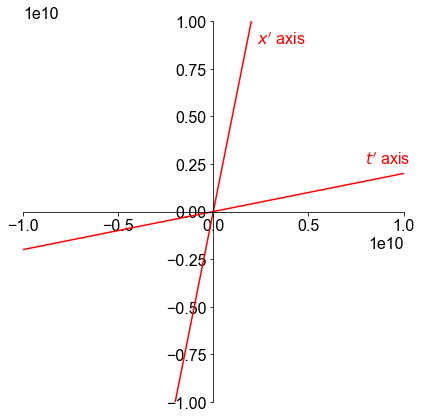

In [11]:
# Set up an array of independent variables t that spans -100 to 100 seconds
times = np.linspace(0, 200, num=201, endpoint=True) - 100

# Make a figure
fig, ax = plt.subplots(figsize=(7,7))

# YOUR CODE HERE: Use ax.plot() to plot the t' and x' axes below
vframe = 0.2 * constants.c
ax.plot(constants.c*times, tprime_axis(times, vframe), color='r')
ax.plot(constants.c*times, xprime_axis(times, vframe), color='r')

# Move the left and bottom "spines" (borders of the plot) to the center
# This makes a math textbook-like set of (x,t) axes instead of a box around the plot
ax.spines['left'].set_position(('data', 0))
ax.spines['bottom'].set_position(('data', 0))

# Take out the top and right spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Make the two axes have the same scale
ax.set_aspect('equal')

# Set the axes ranges
ax.set_xlim([-1e10, 1e10])
ax.set_ylim([-1e10, 1e10])

# YOUR CODE HERE: Use ax.text() to add RED labels to the t' and x' axes below

ax.text(8e9, 2.5e9, r"$t^{\prime}$ axis", color='r')
ax.text(2.3e9, 8.8e9, r"$x^{\prime}$ axis", color='r')

<ol start=4>
    <li>Make a figure that plots $t^{\prime}$ and $x^{\prime}$ axes for $v = 0.25c$, $v = 0.5c$, and $v = 0.75c$. Use different colors for each pair of axes. Make a legend that shows which value of $v$ corresponds to each color.</li>
</ol>

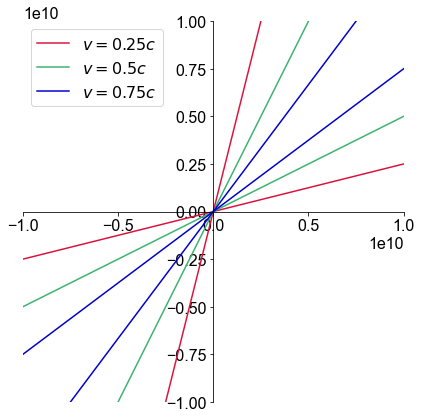

In [13]:
# Plot here. You may copy syntax from the previous cell.
# Make a figure
fig, ax = plt.subplots(figsize=(7,7))

vframes = [0.25 * constants.c, 0.5*constants.c, 0.75*constants.c]
colors = ['crimson', 'mediumseagreen', 'mediumblue']
labels = [r"$v = 0.25c$", r"$v = 0.5c$", r"$v = 0.75c$"]
for i, vf in enumerate(vframes):
    ax.plot(constants.c*times, tprime_axis(times, vf), color=colors[i], label=labels[i])
    ax.plot(constants.c*times, xprime_axis(times, vf), color=colors[i])

ax.spines['left'].set_position(('data', 0))
ax.spines['bottom'].set_position(('data', 0))

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.set_aspect('equal')

ax.set_xlim([-1e10, 1e10])
ax.set_ylim([-1e10, 1e10])

# Add legend
ax.legend(loc='best')

<ol start=5>
    <li>Connect your graph from problem 4 with the discussion of world lines in Chapter 2 of your textbook. What kind of world line do your $(t^{\prime}, x^{\prime})$ axes approach as $v \rightarrow c$? Create a similar plot to problem 4, but this time plot $(t^{\prime}, x^{\prime})$ axes for $v = 0.5, 0.75, 0.875, 0.9375$. To illustrate the concept of taking a limit as $v \rightarrow c$, make each set of $(t^{\prime}, x^{\prime})$ axes a successively darker shade of gray. Plot the limiting world line in black. Add a legend to show which value of $v$ corresponds to which shade of gray. You may find it helpful to specify line colors like this: <tt>color='0.7'</tt>.</li>
</ol>

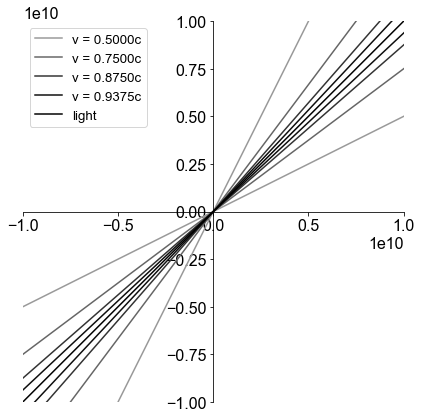

In [22]:
fig, ax = plt.subplots(figsize=(7,7))

v_ratio = [0.5, 0.75, 0.875, 0.9375]
colors = ['0.6', '0.4', '0.2', '0.05']

for i, vr in enumerate(v_ratio):
    lbl = "v = " + f"{vr:.4f}"+"c" # f-string to specify label 
    ax.plot(constants.c*times, tprime_axis(times, vr*constants.c), color=colors[i], label=lbl)
    ax.plot(constants.c*times, xprime_axis(times, vr*constants.c), color=colors[i])
    
# Plot limiting light-like world line
ax.plot(constants.c*times, constants.c*times, color='k', label='light')

ax.spines['left'].set_position(('data', 0))
ax.spines['bottom'].set_position(('data', 0))

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.set_aspect('equal')

ax.set_xlim([-1e10, 1e10])
ax.set_ylim([-1e10, 1e10])

# Add legend
ax.legend(loc='best', fontsize='small')